Notebook Description: Quick example on the usage of mSSA library for forecasting

Forecasting model description: Multivariate Singular Spectrum
Model that is able to handle missing values (imputes values) for forecasting
Based on matrix estimation

Graunlarity of forecast: All sales data at SKU

Whitepaper on forecast model: https://arxiv.org/pdf/2006.13448.pdf

DataSource: https://www.kaggle.com/rohitsahoo/sales-forecasting

Library: https://github.com/AbdullahO/mSSA


SHORTCUT:

KERNALS 0 - 31: DATA PREP
KERNALS 32 - END: MODEL BUILDING AND PLOTTING

In [1]:
import pandas as pd
import numpy as np

from mssa.mssa import mSSA

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
Row ID           9800 non-null int64
Order ID         9800 non-null object
Order Date       9800 non-null object
Ship Date        9800 non-null object
Ship Mode        9800 non-null object
Customer ID      9800 non-null object
Customer Name    9800 non-null object
Segment          9800 non-null object
Country          9800 non-null object
City             9800 non-null object
State            9800 non-null object
Postal Code      9789 non-null float64
Region           9800 non-null object
Product ID       9800 non-null object
Category         9800 non-null object
Sub-Category     9800 non-null object
Product Name     9800 non-null object
Sales            9800 non-null float64
dtypes: float64(2), int64(1), object(15)
memory usage: 1.3+ MB


In [5]:
df.Country.unique()

array(['United States'], dtype=object)

In [6]:
#drop Country

In [7]:
df.State.nunique()

49

In [8]:
df.City.nunique()

529

In [9]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [10]:
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [11]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [12]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [13]:
#forecast model for all sales data
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [14]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name']

df_all = df.drop(cols, axis=1)

In [15]:
df_all.head()

,Order Date,Sales
0,08/11/2017,261.9600
1,08/11/2017,731.9400
2,12/06/2017,14.6200
3,11/10/2016,957.5775
4,11/10/2016,22.3680


In [16]:
df_all['Order Date'] = pd.to_datetime(df_all['Order Date'])

In [17]:
df_all = df_all.sort_values(by=['Order Date'])

In [18]:
print(min(df_all['Order Date']), max(df_all['Order Date']))

2015-01-02 00:00:00 2018-12-30 00:00:00


In [19]:
df_all = df_all.groupby('Order Date').sum()
df_all.reset_index(level=0, inplace=True)

In [20]:
df_all.head()

,Order Date,Sales
0,2015-01-02,468.900
1,2015-01-03,2203.151
2,2015-01-04,119.888
3,2015-01-06,5188.520
4,2015-01-07,601.024


In [21]:
#some dates are missing in the data due to no sales - this is fine. I will create a empty datetime dataframe to add those dates
#mSSA can handle missing values and imputes

In [22]:
datesfill = pd.date_range(start = '2015-01-02', end = '2018-12-30')
df_blank = pd.DataFrame(datesfill)
df_blank.rename({0:'Order Date'}, axis=1, inplace=True)
#df_blank.reset_index(level=0, inplace=True)

In [23]:
df_blank.head()

,Order Date
0,2015-01-02
1,2015-01-03
2,2015-01-04
3,2015-01-05
4,2015-01-06


In [24]:
df_all = df_blank.merge(df_all, on='Order Date', how='left')
#df_all = df_all.fillna(0)

In [25]:
df_all.head()

,Order Date,Sales
0,2015-01-02,468.900
1,2015-01-03,2203.151
2,2015-01-04,119.888
3,2015-01-05,NaN
4,2015-01-06,5188.520


In [26]:
df_all.set_index('Order Date', inplace=True)

In [27]:
#use 2015-01-02 through 2018-06-30 as train
#remainder as test

train = df_all['2015-01-02':'2018-06-30']
test = df_all['2018-06-30':]

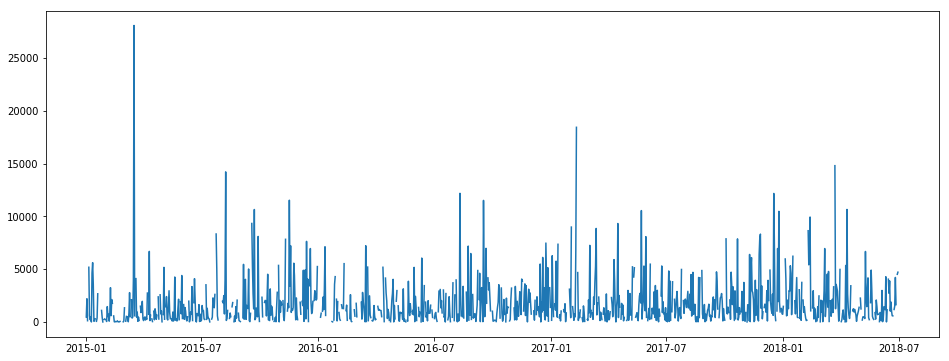

In [30]:
plt.figure(figsize=(16, 6))
plt.plot( train['Sales'], label = 'actual')

In [32]:
#BUILD MODEL
#RANK = 10 (tunable parameter, value determined in another notebook)
model_all = mSSA(rank = 10)
model_all.update_model(train)

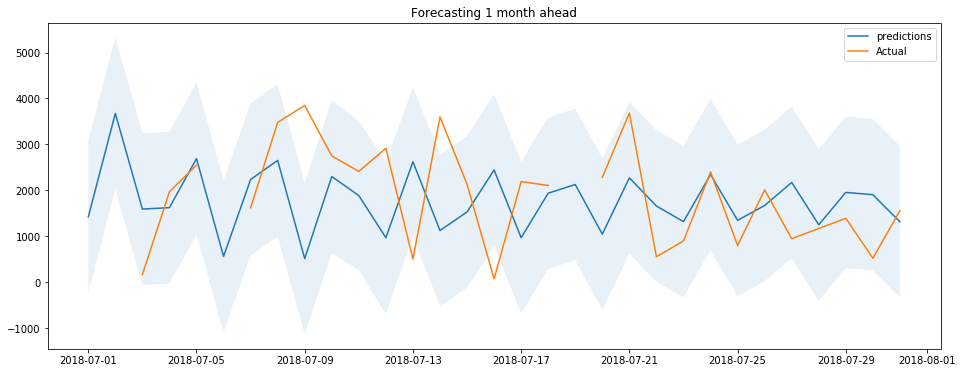

In [33]:
#predict month of july 2018, 2018-07-01 to 2018-07-31
fcst = model_all.predict('Sales','2018-07-01','2018-7-31')

plt.figure(figsize=(16, 6))
plt.plot( fcst['Mean Predictions'], label = 'predictions')
plt.fill_between(fcst.index, fcst['Lower Bound'],fcst['Upper Bound'], alpha = 0.1)
plt.plot(test['2018-07-01':'2018-7-31'], label = 'Actual', alpha = 1.0)
plt.title('Forecasting 1 month ahead')
plt.legend()
plt.show()

Despite having missing values, no visible pattern, and irregularity, the forecast captures the sales trend

In [35]:
#BUILD MODEL NUMBER 2
#RANK = 11 (tunable parameter, value determined in another notebook)
model_all = mSSA(rank = 11)
model_all.update_model(train)

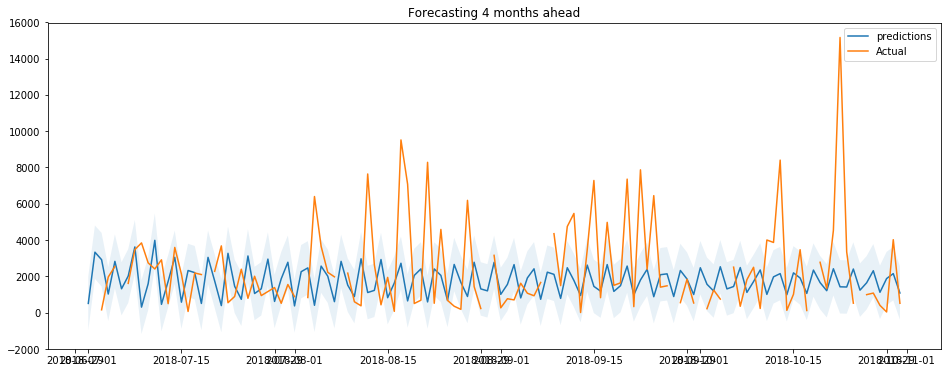

In [37]:
#predict month of july 2018, 2018-07-01 to 2018-10-31
fcst = model_all.predict('Sales','2018-07-01','2018-10-31')

plt.figure(figsize=(16, 6))
plt.plot( fcst['Mean Predictions'], label = 'predictions')
plt.fill_between(fcst.index, fcst['Lower Bound'],fcst['Upper Bound'], alpha = 0.1)
plt.plot(test['2018-07-01':'2018-10-31'], label = 'Actual', alpha = 1.0)
plt.title('Forecasting 4 months ahead')
plt.legend()
plt.show()

Despite noisy data without any visible pattern or seasonality - matrix approximation method is able to predict capture this behavior aside from the sudden jumps in demand